# Analisis exploratorio del dataset

In [2]:
!pip install pandas matplotlib seaborn

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (2

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./data/category_cryptos_small.csv')
df.shape

(1000, 11)

In [6]:
df.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,circulating_supply,total_supply,max_supply,categoria
0,bittensor,tao,Bittensor,347.690000,3.025418e+09,42.0,68796044.0,8.700789e+06,2.100000e+07,2.100000e+07,AI
1,near,near,NEAR Protocol,2.330000,2.815063e+09,44.0,113775800.0,1.210004e+09,1.248424e+09,NaN,AI
2,internet-computer,icp,Internet Computer,4.620000,2.462019e+09,49.0,39404172.0,5.327720e+08,5.327720e+08,NaN,AI
3,render-token,render,Render,4.280000,2.218585e+09,54.0,172169462.0,5.177166e+08,5.324768e+08,NaN,AI
4,fetch-ai,fet,Artificial Superintelligence Alliance,0.661442,1.723176e+09,65.0,93431713.0,2.604959e+09,2.714494e+09,2.714494e+09,AI


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1000 non-null   object 
 1   symbol              1000 non-null   object 
 2   name                1000 non-null   object 
 3   current_price       1000 non-null   float64
 4   market_cap          1000 non-null   float64
 5   market_cap_rank     934 non-null    float64
 6   total_volume        1000 non-null   float64
 7   circulating_supply  1000 non-null   float64
 8   total_supply        989 non-null    float64
 9   max_supply          847 non-null    float64
 10  categoria           1000 non-null   object 
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [14]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_columns.__len__())
print("Categorical columns:", categorical_columns.__len__())
numeric_columns, categorical_columns


Numeric columns: 7
Categorical columns: 4


(['current_price',
  'market_cap',
  'market_cap_rank',
  'total_volume',
  'circulating_supply',
  'total_supply',
  'max_supply'],
 ['id', 'symbol', 'name', 'categoria'])

In [22]:
df.isnull().sum()

id                      0
symbol                  0
name                    0
current_price           0
market_cap              0
market_cap_rank        66
total_volume            0
circulating_supply      0
total_supply           11
max_supply            153
categoria               0
dtype: int64

In [26]:
(df.isnull().mean() * 100).round(2).sort_values(ascending=False).head(10)

max_supply            15.3
market_cap_rank        6.6
total_supply           1.1
name                   0.0
symbol                 0.0
id                     0.0
current_price          0.0
total_volume           0.0
market_cap             0.0
circulating_supply     0.0
dtype: float64

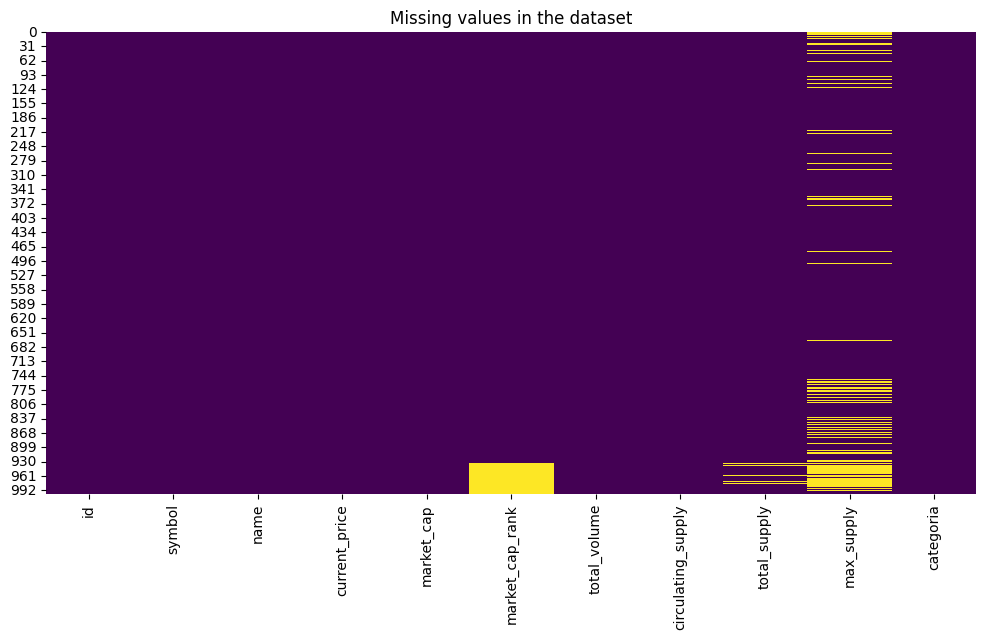

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

Observamos 3 columnas numericas con valores nulos. Aparentes patrones en `market_cap_rank` y `total_supply`

In [27]:
df.describe()

,current_price,market_cap,market_cap_rank,total_volume,circulating_supply,total_supply,max_supply
count,1.000000e+03,1.000000e+03,934.000000,1.000000e+03,1.000000e+03,9.890000e+02,8.470000e+02
mean,1.643993e+04,1.284718e+08,1593.145610,7.846174e+06,6.755017e+14,1.255784e+15,1.496098e+15
std,5.183448e+05,9.713825e+08,1274.675494,3.710722e+07,1.006440e+16,2.026963e+16,2.214866e+16
min,8.300900e-11,0.000000e+00,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.646735e-03,3.289863e+06,753.250000,3.909475e+04,8.650358e+07,1.800000e+08,5.000000e+08
50%,2.200277e-02,1.057735e+07,1394.000000,2.693090e+05,6.626902e+08,9.999922e+08,1.000000e+09
75%,1.772772e-01,3.756500e+07,2039.500000,2.737444e+06,1.763549e+09,4.925702e+09,8.000004e+09
max,1.639154e+07,2.569485e+10,9702.000000,7.097104e+08,1.879982e+17,4.200000e+17,4.200000e+17


Observamos posibles valores nulos, en `market_cap`, `total_volume`, `circulating_supply` y `total_supply`

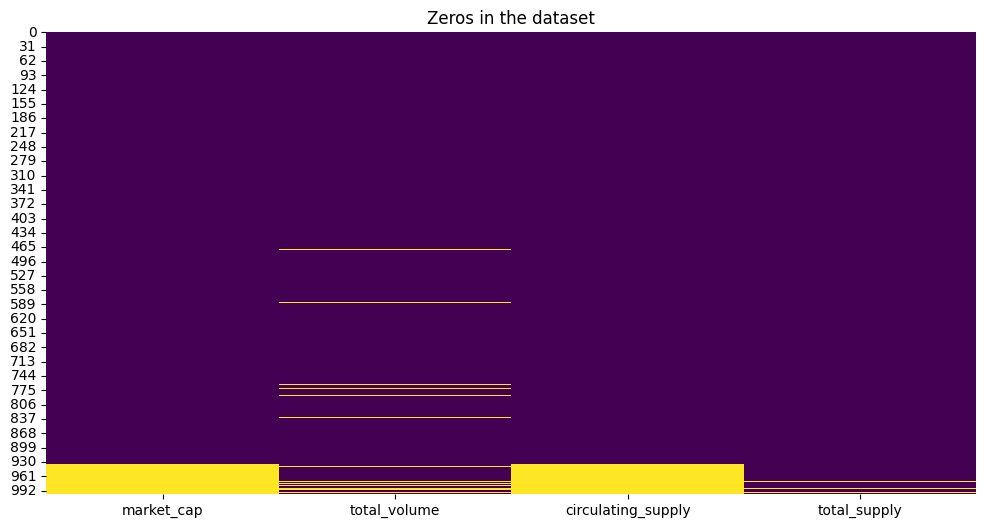

In [36]:
hipo_nulls = ['market_cap', 'total_volume', 'circulating_supply', 'total_supply']

# Crear un DataFrame booleano donde los valores son 0
# si el valor es 0 y 1 si no lo es
df_zeros = df[hipo_nulls] == 0
# Crear un mapa de calor de ceros
plt.figure(figsize=(12, 6))
sns.heatmap(df_zeros, cbar=False, cmap='viridis')
plt.title('Zeros in the dataset')
plt.show()


Al cumplir con el mismo patron que los datos nulos, la incosistencia de un 0 como medida, y su predominancia entre los registros 930 - 1000. 
Validamos la hipotesis de una perdida de datos tipo parche en estas categorias, donde trataremos estos 0s como valores nulos 

## Iteracion 1

Dada la perdida de informacion tipo parche en los ultimos registros. Se requiere extender el dataset antes de continuar para abordar la signficacia estadistica de la aparicion de valores nulos